## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
mouse_merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
mouse_merge_df['Mouse ID'].count()

1893

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = mouse_merge_df.duplicated(subset=['Mouse ID', 'Timepoint'])
duplicates.sum()

5

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_merge_df.loc[duplicates, :]
print(mouse_merge_df.loc[duplicates, :])

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data = mouse_merge_df.drop_duplicates(subset= ['Mouse ID','Timepoint'], keep='first')

In [7]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_data['Mouse ID'].count()

1888

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
mouse_regimens_df = clean_mouse_data.groupby('Drug Regimen')

In [9]:
# mean, median, variance, and standard deviation of the tumor volume.
TV_mean = mouse_regimens_df['Tumor Volume (mm3)'].mean()
TV_median = mouse_regimens_df['Tumor Volume (mm3)'].median()
TV_variance = mouse_regimens_df['Tumor Volume (mm3)'].var()
TV_SD = mouse_regimens_df['Tumor Volume (mm3)'].std()

In [10]:
# Calculate SEM
TV_sample = mouse_regimens_df['Tumor Volume (mm3)'].sample(20)
TV_SEM = sem(TV_sample)

In [11]:
# Assemble the resulting series into a single summary dataframe.
TV_stats_df = pd.DataFrame({
    "Mean": TV_mean,
    "Median": TV_median,
    "Variance": TV_variance,
    "Standard Deviation": TV_SD,
    "SEM": TV_SEM
})

print(TV_stats_df)

                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.614119
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.614119
Infubinol     52.884795  51.820584  43.128684            6.567243  0.614119
Ketapril      55.235638  53.698743  68.553577            8.279709  0.614119
Naftisol      54.331565  52.509285  66.173479            8.134708  0.614119
Placebo       54.033581  52.288934  61.168083            7.821003  0.614119
Propriva      52.393463  50.909965  43.138803            6.568014  0.614119
Ramicane      40.216745  40.673236  23.486704            4.846308  0.614119
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.614119
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.614119


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

<AxesSubplot:>

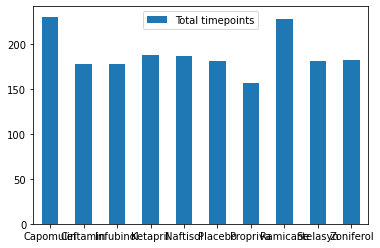

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoint_sum = mouse_regimens_df['Timepoint'].count()
drug_regimens = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
timepoint_bargraph_df = pd.DataFrame({"Total timepoints": timepoint_sum}, index = drug_regimens)
timepoint_bargraph_df.plot.bar(rot=0)


Text(0, 0.5, 'Number of Timepoints')

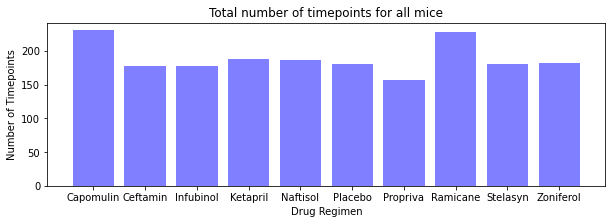

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.figure(figsize=(10,3))
plt.bar(drug_regimens, timepoint_sum, color='b', alpha=0.5, align="center")
plt.title("Total number of timepoints for all mice")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = clean_mouse_data['Sex'].value_counts()
print(gender)

Male      958
Female    930
Name: Sex, dtype: int64


<AxesSubplot:ylabel='Sex'>

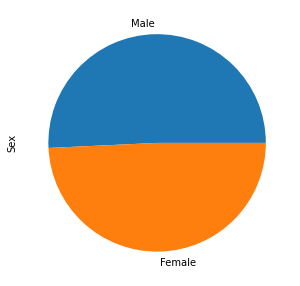

In [16]:
gender.plot.pie(y='Sex', figsize=(5,5))

Text(0.5, 1.0, 'Division of Lab Mice by Sex')

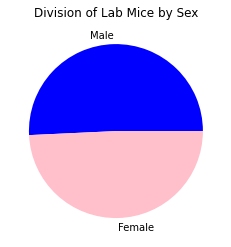

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male', 'Female']
sizes = [958, 930]
colors = ["blue", "pink"]
plt.pie(sizes, labels=labels, colors=colors)
plt.title("Division of Lab Mice by Sex")

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin = mouse_regimens_df.get_group('Capomulin')
Ramicane = mouse_regimens_df.get_group('Ramicane')
Infubinol = mouse_regimens_df.get_group('Infubinol')
Ceftamin = mouse_regimens_df.get_group('Ceftamin')

mouse_regimens_2 = pd.concat({
    'Capomulin': Capomulin,
    'Ramicane': Ramicane,
    'Infubinol': Infubinol,
    'Ceftamin': Ceftamin
})

print(mouse_regimens_2)

               Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  \
Capomulin 10       s185    Capomulin  Female           3          17   
          11       s185    Capomulin  Female           3          17   
          12       s185    Capomulin  Female           3          17   
          13       s185    Capomulin  Female           3          17   
          14       s185    Capomulin  Female           3          17   
...                 ...          ...     ...         ...         ...   
Ceftamin  1851     y865     Ceftamin    Male          23          26   
          1852     y865     Ceftamin    Male          23          26   
          1853     y865     Ceftamin    Male          23          26   
          1854     y865     Ceftamin    Male          23          26   
          1855     y865     Ceftamin    Male          23          26   

                Timepoint  Tumor Volume (mm3)  Metastatic Sites  
Capomulin 10            0           45.000000                 0  
   

In [19]:
# Start by getting the last (greatest) timepoint for each mouse
final_timepoint = mouse_regimens_2['Timepoint'].max()
time_group = mouse_regimens_2.groupby('Timepoint')
final_volume_group = time_group.get_group(45)
print(final_volume_group)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

               Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  \
Capomulin 19       s185    Capomulin  Female           3          17   
          29       x401    Capomulin  Female          16          15   
          39       m601    Capomulin    Male          22          17   
          104      u364    Capomulin    Male          18          17   
          124      y793    Capomulin    Male          17          17   
...                 ...          ...     ...         ...         ...   
Ceftamin  1670     w151     Ceftamin    Male          24          25   
          1773     x581     Ceftamin  Female          19          28   
          1797     x822     Ceftamin    Male           3          29   
          1845     y769     Ceftamin  Female           6          27   
          1855     y865     Ceftamin    Male          23          26   

                Timepoint  Tumor Volume (mm3)  Metastatic Sites  
Capomulin 19           45           23.343598                 1  
   

In [20]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin','Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = final_volume_group['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f'The lower quartile of tumor volume is: {lowerq}')
print(f'The upper quartile of tumor volume is: {upperq}')
print(f'The interquartile range of tumor volume is: {iqr}')

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    

The lower quartile of tumor volume is: 33.48002734
The upper quartile of tumor volume is: 62.14221369
The interquartile range of tumor volume is: 28.66218635


In [21]:
    # Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

outlier_tv = final_volume_group.loc[(final_volume_group['Tumor Volume (mm3)'] < lower_bound) | (final_volume_group['Tumor Volume (mm3)'] > upper_bound)]
outlier_tv

,,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


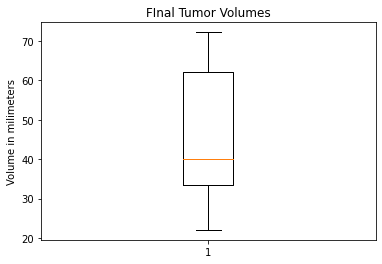

In [22]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumor_volume = final_volume_group['Tumor Volume (mm3)']

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volumes')
ax1.set_ylabel('Volume in milimeters')
ax1.boxplot(tumor_volume)
plt.show()


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume in Milimeters')

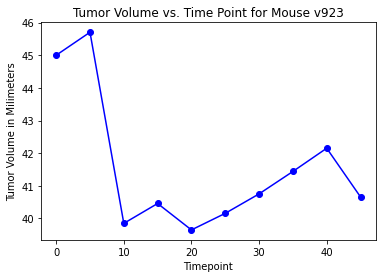

In [23]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse = clean_mouse_data.loc[clean_mouse_data['Mouse ID']=='v923']
Capomulin_x_axis = mouse['Timepoint']
Capomulin_y_var = mouse['Tumor Volume (mm3)']
Capomulin_line, = plt.plot(Capomulin_x_axis, Capomulin_y_var, marker = 'o', color = 'blue', label = "Tumor Volume")
plt.title("Tumor Volume vs. Time Point for Mouse v923")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume in Milimeters")


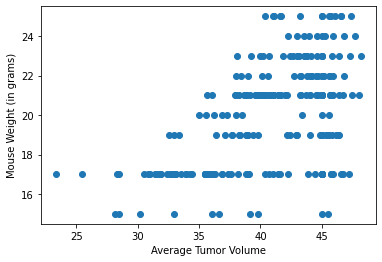

In [24]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
average_tv = Capomulin['Tumor Volume (mm3)']
mouse_weight = Capomulin['Weight (g)']
plt.scatter(average_tv, mouse_weight)
plt.xlabel('Average Tumor Volume')
plt.ylabel('Mouse Weight (in grams)')
plt.show()


## Correlation and Regression

In [25]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(average_tv, mouse_weight)
print(correlation)

(0.5256995552077165, 9.605446629502825e-18)


The r-squared is: 0.27636002234559165


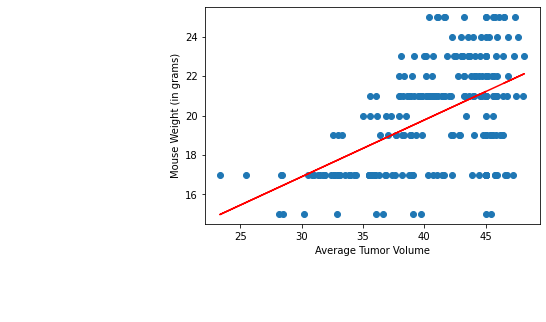

In [26]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(average_tv, mouse_weight)
regress_values = average_tv*slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
plt.scatter(average_tv, mouse_weight)
plt.plot(average_tv, regress_values, "r-")
plt.annotate(line_eq, (6, 10), fontsize = 10, color = "red")
plt.xlabel('Average Tumor Volume')
plt.ylabel('Mouse Weight (in grams)')
print(f'The r-squared is: {rvalue**2}')
plt.show()
